In [5]:
%matplotlib inline
from matplotlib import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import h5py
from matplotlib.backends.backend_pdf import PdfPages

sns.set_style('white')

In [6]:
#Get the FIDDLE prediction
f = h5py.File('FIDDLE_alpha/results/test/predictions_.hdf5','r')

#Get the data used for training
f2 = h5py.File('data/NS_MS_DS_RS_CS_TS_generic.hdf5','r')

In [7]:
#Load the info and predictions tracks (Loading partially is recommended for large file sizes)
infodata = f.get('info')[:]
predictions = f.get('predictions')[:]

# Load the info track as a reference from the data used for training
infoRef = f2.get('info')[:]

In [8]:
print(f.items())

[(u'info', <HDF5 dataset "info": shape (129000, 4), type "<f4">), (u'predictions', <HDF5 dataset "predictions": shape (129000, 500), type "<f4">)]


In [9]:
# I don't know what this is for
#
# idx = np.zeros((infodata.shape[0]))
# for ix in range(infodata.shape[0]):
#     tf = (infoRef[:,0]==infodata[ix,0]) & (infoRef[:,1]==infodata[ix,1])& (infoRef[:,2]==infodata[ix,2]) \
#         & (infoRef[:,3]==infodata[ix,3])
#     idx[ix]=np.where(tf)[0]

In [10]:
# assert that the info tensor from prediction and input match to make sure indices align
assert (infodata == infoRef).all(), 'info data do not match'

In [11]:
# extract particular -seq tensor dataset
# NETseq = f2.get('NETseq')[:]
TSSseq = f2.get('TSSseq')[:]

In [12]:
TSSseq.shape

(129000, 2, 500)

In [19]:
# make directory to store pdf output for next cell
# !mkdir -p Figures

In [23]:
# produces pdf with random inspections of prediction vs input (e.g. TSS prediction output overlayed on TSS input data)
pl.ioff()
pp = PdfPages('Figures/predictions.pdf')
np.seterr(divide='ignore', invalid='ignore')

for ix in np.random.randint(infodata.shape[0],size=50):
    xran = np.arange(int(infodata[ix,3]),int(infodata[ix,3])+500)
    fig = pl.figure()
    pl.plot(xran,TSSseq[ix,0]/np.sum(TSSseq[ix,0]));
#     pl.plot(xran,-TSSseq[ix,1]/np.sum(TSSseq[ix,1]));
    pl.plot(xran,predictions[ix],color='red',alpha=0.8)
    pl.xlabel('Genomic coordinate (bp) - Chr'+ str(int(infodata[ix,0])))
    pl.ylabel('Probability density function')
    pp.savefig()
    pl.close(fig)

pp.close()

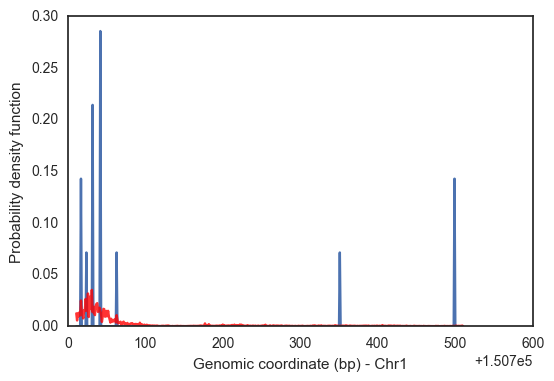

In [26]:
%matplotlib inline
ix=1600
xran = np.arange(int(infodata[ix,3]),int(infodata[ix,3])+500)
pl.plot(xran,TSSseq[ix,0]/np.sum(TSSseq[ix,0]));
# pl.plot(xran,-TSSseq[ix,1]/np.sum(TSSseq[ix,1])); # examines negative strand prediction
pl.plot(xran,predictions[ix],color='red',alpha=0.8)
pl.xlabel('Genomic coordinate (bp) - Chr'+ str(int(infodata[ix,0])))
pl.ylabel('Probability density function')

In [101]:
print(infodata.shape)

(129000, 4)


In [ ]:
######################################################################################################################
# beyond this point, idk what's going on
######################################################################################################################

In [ ]:
TSSdata[0].shape

In [ ]:
f.close()
f = h5py.File('../results/ds_out_ts_test/predictions.hdf5','r')
f2 = h5py.File('../data/hdf5datasets/NSMSDSRSCSTSRI.hdf5','r')

In [ ]:
infodata = f.get('info')[:]
predictions = f.get('predictions')[:]

infoRef = f2.get('info')[:]

In [ ]:
idx = np.zeros((infodata.shape[0]))
for ix in range(infodata.shape[0]):
    
    tf_ = (infoRef[:,0]==infodata[ix,0]) & (infoRef[:,1]==infodata[ix,1])& (infoRef[:,2]==infodata[ix,2]) \
        & (infoRef[:,3]==infodata[ix,3])
    idx[ix]=np.where(tf_)[0]
idx = idx.astype(int)

In [ ]:
DNAseq = f2.get('DNAseq')[idx.tolist()]
NETseq = f2.get('NETseq')[idx.tolist()]
TSSseq = f2.get('TSSseq')[idx.tolist()]
ChIPseq = f2.get('ChIPseq')[idx.tolist()]
infoRef = infoRef[idx.tolist()]

In [ ]:
import sys
sys.path.append('/Users/umut/Projects/deeplift/')

from deeplift.visualization import viz_sequence


In [ ]:
viz_sequence.plot_weights(DNAseq[10,:,240:250])

In [ ]:
i+=1
pl.plot(NETseq[i,0,:])
pl.plot(-NETseq[i,1,:])
pl.show()
pl.plot(TSSseq[i,0,:])
pl.plot(-TSSseq[i,1,:])
pl.show()
pl.plot(ChIPseq[i,0,:])
pl.plot(-ChIPseq[i,1,:])
pl.show()
viz_sequence.plot_weights(DNAseq[i,:,:]*predictions[i,:,:],subticks_frequency=10)

In [ ]:
info = np.apply_along_axis(lambda x: -np.log(0.25)+np.sum(x*np.log(x)),1,predictions)


In [ ]:
pl.plot(info[i]);

In [ ]:
i+=1

### GERP analysis

In [ ]:
import genome.db


In [ ]:
gdb = genome.db.GenomeDB(path='/Users/umut/Projects/genome/data/share/genome_db',assembly='sacCer3')


In [ ]:
gdb.list_tracks()

In [ ]:
TSpos = gdb.open_track('TSpos')
TSneg = gdb.open_track('TSneg')
phyloP = gdb.open_track('phyloP')


In [ ]:
sys.path.append('/Users/umut/Projects/ClassifyStrain/')


In [ ]:
import roman as rm 

In [ ]:
chname = 'chr'+rm.toRoman(infoRef[i,0])
infoRef[i,:]

In [ ]:
vec = phyloP.get_nparray(chname,infoRef[i,3]+1,infoRef[i,3]+500)

In [ ]:
vec.shape

In [ ]:
pl.plot(np.flipud(vec))
pl.plot(TSpos.get_nparray(chname,infoRef[i,3]+1,infoRef[i,3]+500))

In [ ]:
tmp = (-vec-min(-vec)+0.)/max(-vec-min(-vec))

In [ ]:
pl.plot(np.flipud(tmp))

In [ ]:
viz_sequence.plot_weights((info[i,:])*DNAseq[i,:,:],subticks_frequency=10)

In [ ]:
viz_sequence.plot_weights(np.exp(tmp)*DNAseq[i,:,:],subticks_frequency=10)

In [ ]:
pl.scatter(vec,info[i,:])

In [ ]:
fyac = h5py.File('../results/nsmsdsrs_only/predictions_Dhan_yac.hdf5','r')
fdhan = h5py.File('../results/nsmsdsrs_only/predictions_Dhan_native_yacregion.hdf5','r')
fyacNoDS = h5py.File('../results/nsmsrs_only/predictions_Dhan_yac.hdf5','r')
fdhanNoDS = h5py.File('../results/nsmsrs_only/predictions_Dhan_native_yacregion.hdf5','r')

# fyacDS = h5py.File('../results/ds_only/predictions_Dhan_yac.hdf5','r')
# fdhanDS = h5py.File('../results/ds_only/predictions_Dhan_native_yacregion.hdf5','r')

# fyac0 = h5py.File('../data/hdf5datasets/Dhan_yac.hdf5','r')
# fdhan0 = h5py.File('../data/hdf5datasets/Dhan_native_yacregion.hdf5','r')

In [ ]:
infoYAC = fyac.get('info')[:]
predYAC = fyac.get('predictions')[:]

infoRef = fyac0.get('info')[:]

idx = np.zeros((infoYAC.shape[0]))
for ix in range(infoYAC.shape[0]):
    
    tf_ = (infoRef[:,0]==infoYAC[ix,0]) & (infoRef[:,1]==infoYAC[ix,1])& (infoRef[:,2]==infoYAC[ix,2]) \
        & (infoRef[:,3]==infoYAC[ix,3])
    idx[ix]=np.where(tf_)[0]
idx = idx.astype(int)

In [ ]:
infoYACds = fyacDS.get('info')[:]
predYACds = fyacDS.get('predictions')[:]
infoYACnods = fyacNoDS.get('info')[:]
predYACnods = fyacNoDS.get('predictions')[:]
infoNATnods = fdhanNoDS.get('info')[:]
predNATnods = fdhanNoDS.get('predictions')[:]


In [ ]:
infoNAT = fdhan.get('info')[:]
predNAT = fdhan.get('predictions')[:]

infoRef = fdhan0.get('info')[:]

idxN = np.zeros((infoNAT.shape[0]))
for ix in range(infoNAT.shape[0]):
    
    tf_ = (infoRef[:,0]==infoNAT[ix,0]) & (infoRef[:,1]==infoNAT[ix,1])& (infoRef[:,2]==infoNAT[ix,2]) \
        & (infoRef[:,3]==infoNAT[ix,3])
    idxN[ix]=np.where(tf_)[0]
idxN = idxN.astype(int)

In [ ]:


NETseqY = fyac0.get('NETseq')[idx.tolist()]
MNaseseqY = fyac0.get('MNaseseq')[idx.tolist()]
RNAseqY = fyac0.get('RNAseq')[idx.tolist()]


In [ ]:

NETseqN = fdhan0.get('NETseq')[idxN.tolist()]
MNaseseqN = fdhan0.get('MNaseseq')[idxN.tolist()]
RNAseqN = fdhan0.get('RNAseq')[idxN.tolist()]


In [ ]:
chname =['Deha2C','Deha2D']
np.all(infoYAC==infoNAT), np.all(infoYAC==infoYACds) ,np.all(infoYAC==infoYACnods)



In [ ]:
(infoYAC[:,0]==1)&(infoYAC[:,3]>=1.25710e6)

In [ ]:
# i=10301
print infoYAC[np.where((infoYAC[:,0]==1)&(infoYAC[:,3]>=1.25710e6))[0][0],:]
i=np.where((infoYAC[:,0]==1)&(infoYAC[:,3]>=1.25710e6))[0][0]
i

In [ ]:
i=2307
# i+=100
# i+=5
# pp = PdfPages('Figures/dhan_vs_YAC_predictions_'+chname[int(infoYAC[i,0])-1]+'_pos'+str(infoYAC[i,3])+'_idx'+str(i)+'.pdf')

print infoYAC[i]
pl.plot(NETseqY[i,0,:])
pl.plot(-NETseqY[i,1,:])
# pp.savefig()

pl.show()
pl.plot(NETseqN[i,0,:])
pl.plot(-NETseqN[i,1,:])
# pp.savefig()

pl.show()
pl.plot(RNAseqY[i,0,:])
pl.plot(RNAseqN[i,0,:])
# pp.savefig()


pl.show()
pl.plot(predYAC[i,:])
pl.plot(predNAT[i,:])
# pp.savefig()

pl.show()
pl.plot(predYACds[i,:])
# pp.savefig()

pl.show()
pl.plot(predYACnods[i,:])
pl.plot(predNATnods[i,:])
# pp.savefig()
# pp.close()


In [ ]:
deepDates = pd.read_csv('deepDates.txt',header=None)
deepDates['year']=deepDates[0].apply(lambda x: x.split('-')[0])

In [ ]:
sns.countplot(x='year',data=deepDates)
pl.savefig('deepPapers.pdf')

In [ ]:
deepDates['year'].value_counts()